<a href="https://colab.research.google.com/github/Junaid-Akbar35/CodeAlpha_Project_/blob/main/Task_3_Car_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 3: Car Price Prediction with Machine Learning**

This task involves building a machine learning model to predict the price of a car based on its features. It is a regression problem where we aim to learn relationships between car features and their prices.

---

### **Dataset Overview**
- **Source**: [Car Price Dataset](https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv).
- **Features**:
  - **CarName**: Name of the car (brand and model).
  - **FuelType**: Type of fuel used (e.g., gas, diesel).
  - **Horsepower**: Power output of the car's engine.
  - **Mileage**: Fuel efficiency.
  - **Price**: Target variable, representing the price of the car.

---

### **Analysis Objectives**
1. Understand and preprocess the dataset.
2. Train a regression model to predict car prices.
3. Evaluate model performance using appropriate metrics.

---






### **Step 1: Import Libraries**

In [79]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### **Step 2: Load the Dataset**

In [80]:
# Load the dataset
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv"
df = pd.read_csv(url)

# Display the first few rows
print("First 5 Rows of the Dataset:")
print(df.head())

# Check dataset structure
print("\nDataset Info:")
df.info()


First 5 Rows of the Dataset:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight en

### **Step 3: Handle Missing Values and Clean Data**

In [81]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# No missing values in the dataset



Missing Values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### **Step 5: Remove Outliers**

In [83]:
# Remove outliers for numerical columns
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['price', 'horsepower', 'enginesize']:
    df = remove_outliers(df, col)

print("\nShape after removing outliers:", df.shape)



Shape after removing outliers: (189, 72)


### **Step 5: Feature Engineering**
1. Extract the car brand from the `CarName` column.
2. Apply **LabelEncoder** to categorical variables.



In [85]:
# prompt: jo catagorical colums hain unki values ko numeric ke andar convert kar do

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column is of object type (categorical)
    if df[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        df[col] = le.fit_transform(df[col])

### **Step 7: Split Data into Train and Test Sets**

In [86]:
# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)



Training Set Shape: (151, 71)
Testing Set Shape: (38, 71)


### **Step 8: Train the Linear Regression Mode**

In [87]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")



Model Coefficients:
car_ID: 180.60874942524967
symboling: 288.400437552693
wheelbase: 164.2469777556571
carlength: -108.54330704299355
carwidth: 299.2169212884801
carheight: -197.67480299621457
curbweight: 2498.29924581822
enginesize: 150.32554021031683
boreratio: -535.2694117530409
stroke: -1326.333953531681
compressionratio: -441.27912813040894
horsepower: -283.73685958947135
peakrpm: 0.3192955988779431
citympg: -628.0895933417305
highwaympg: 897.1106243150716
fueltype_gas: -3441.717356036661
aspiration_turbo: 2221.579392316906
doornumber_two: -498.4779869115646
carbody_hardtop: -753.8380865562258
carbody_hatchback: -563.980495111754
carbody_sedan: -287.1766468537553
carbody_wagon: -512.3968755165333
drivewheel_fwd: -282.76230466427296
drivewheel_rwd: 201.61870263015226
enginelocation_rear: 2.2737367544323206e-12
enginetype_dohcv: -2.7284841053187847e-12
enginetype_l: -2476.1950186304475
enginetype_ohc: -645.7122421192731
enginetype_ohcf: -5985.596162886395
enginetype_ohcv: -1633.58

### **Step 9: Evaluate the Model**


Mean Squared Error (MSE): 2595464.1469
Root Mean Squared Error (RMSE): 1611.0444
R-squared Score: 0.8701


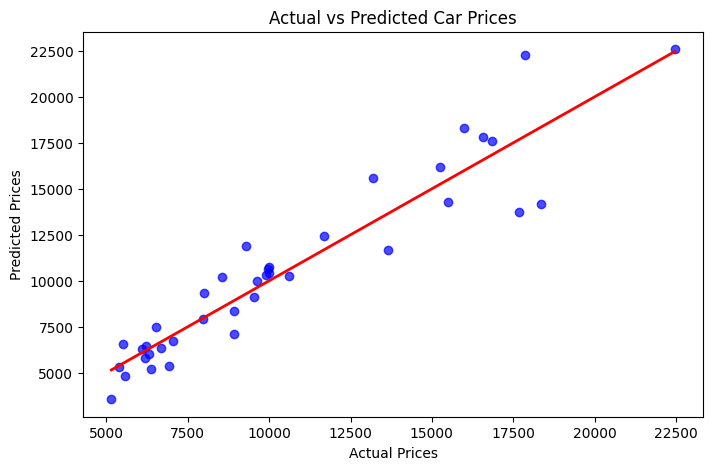

In [88]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title("Actual vs Predicted Car Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


### **Step 10. Save the trained model**

In [91]:
# Save the trained model
import joblib
joblib.dump(model, "car_price_model.pkl")
print("Model saved as 'car_price_model.pkl'")


Model saved as 'car_price_model.pkl'
